In [ ]:
#gpu

In [1]:
!pip install diffusers transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 11.3 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from io import BytesIO
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Unconditional

In [ ]:
pretrained_model_or_path = "CompVis/ldm-celebahq-256"

In [ ]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path)
imagem = pipeline(num_inference_steps=50).images[0]

model_index.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

vqvae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

vqvae/config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/221M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

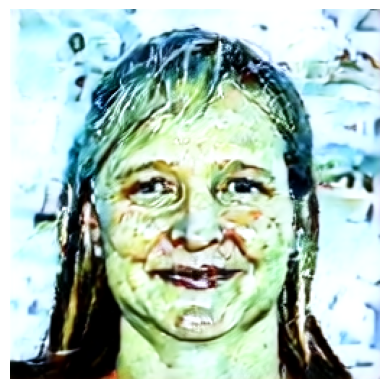

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Simple

In [ ]:
pretrained_model_or_path ="stabilityai/stable-diffusion-xl-base-1.0"
prompt = "A photo realistic a dog with sharp teeth"

In [ ]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path,
                                         torch_dtype=torch.float16, use_safetensors=True).to("cuda")
#fatiamento de atenção reduz o uso de memória
pipeline.enable_attention_slicing()
imagem = pipeline(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

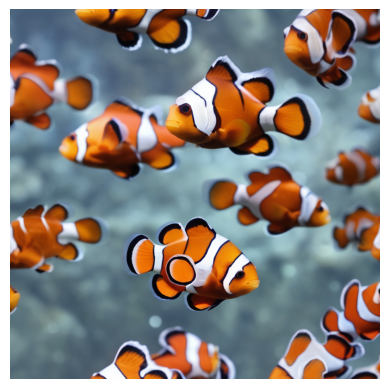

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Condicional com mais Parâmetros

In [ ]:
prompt = "a dog with sharp teeth."
negative_prompt = "Do not include any human figures in the landscape."
pretrained_model_or_path =  "stabilityai/stable-diffusion-2-1-base"
num_images_per_prompt = 3
num_inference_steps = 100
height = 512
width = 512
guidance_scale = 8

In [ ]:
scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_model_or_path, subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_or_path ,
                                                   scheduler=scheduler, torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#reprodutividade
generator = torch.Generator(device="cuda").manual_seed(123)
imagem = pipeline(prompt=prompt, num_images_per_prompt=num_images_per_prompt,
           negative_prompt = negative_prompt,
           num_inference_steps=num_inference_steps,
           height = height, width = width,
           guidance_scale = guidance_scale,
           generator = generator
           )

  0%|          | 0/100 [00:00<?, ?it/s]

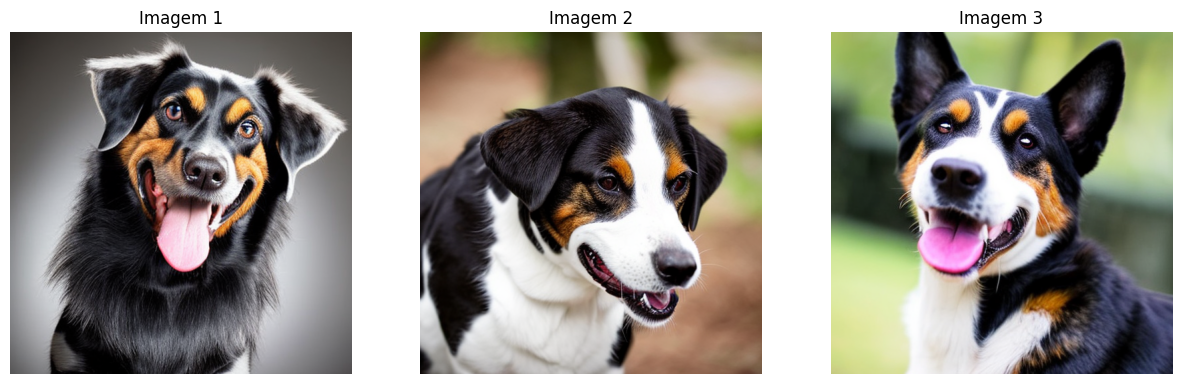

In [ ]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()

## Variações de uma imagem

In [3]:
pretrained_model_or_path = "Norod78/SDXL-Caricaturized-Lora"
url = "https://s3-sa-east-1.amazonaws.com/thedevconf/photos/65a89d82dcf3296143543ada8e880548cbcfdf50.png"
num_images_per_prompt = 1
num_inference_steps = 100

In [4]:
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(pretrained_model_or_path, revision="v2.0").to("cuda")
response = requests.get(url)
imagem_web = Image.open(BytesIO(response.content)).convert("RGB")
imagem = pipeline(imagem_web, num_images_per_prompt =num_images_per_prompt,  num_inference_steps = num_inference_steps)

Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-657a08a7-3b2604bd3b2b6d881c6a328c;9d73c940-0f2b-4154-9dd8-ae207ca98999)

Revision Not Found for url: https://huggingface.co/api/models/Norod78/SDXL-Caricaturized-Lora/revision/v2.0.
Invalid rev id: v2.0.
Will try to load from local cache.


OSError: ignored

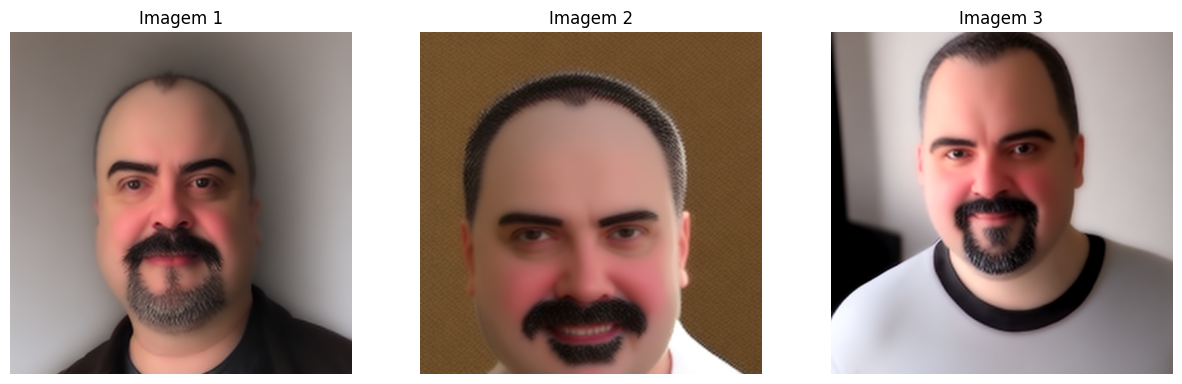

In [ ]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()